# Image Segmentation Example

--2025-05-21 01:47:23--  http://www.robots.ox.ac.uk/~vgg/data/pets/data/images.tar.gz
Resolving www.robots.ox.ac.uk (www.robots.ox.ac.uk)... 129.67.94.2
Connecting to www.robots.ox.ac.uk (www.robots.ox.ac.uk)|129.67.94.2|:80... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://www.robots.ox.ac.uk/~vgg/data/pets/data/images.tar.gz [following]
--2025-05-21 01:47:24--  https://www.robots.ox.ac.uk/~vgg/data/pets/data/images.tar.gz
Connecting to www.robots.ox.ac.uk (www.robots.ox.ac.uk)|129.67.94.2|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://thor.robots.ox.ac.uk/pets/images.tar.gz [following]
--2025-05-21 01:47:24--  https://thor.robots.ox.ac.uk/pets/images.tar.gz
Resolving thor.robots.ox.ac.uk (thor.robots.ox.ac.uk)... 129.67.95.98
Connecting to thor.robots.ox.ac.uk (thor.robots.ox.ac.uk)|129.67.95.98|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 791918971 (755M) [app

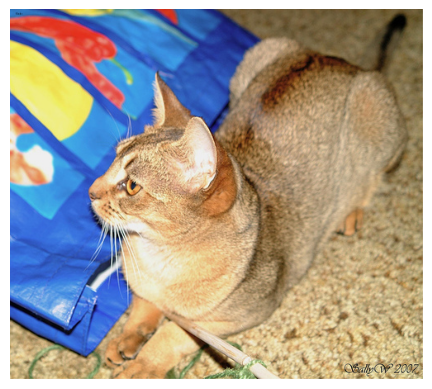

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 200, 200, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ rescaling (Rescaling)           │ (None, 200, 200, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 100, 100, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 100, 100, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 50, 50, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 50, 50, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 25, 25, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 25, 25, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_transpose                │ (None, 25, 25, 256)    │       590,080 │
│ (Conv2DTranspose)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_transpose_1              │ (None, 50, 50, 256)    │       590,080 │
│ (Conv2DTranspose)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_transpose_2              │ (None, 50, 50, 128)    │       295,040 │
│ (Conv2DTranspose)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_transpose_3              │ (None, 100, 100, 128)  │       147,584 │
│ (Conv2DTranspose)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_transpose_4              │ (None, 100, 100, 64)   │        73,792 │
│ (Conv2DTranspose)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_transpose_5              │ (None, 200, 200, 64)   │        36,928 │
│ (Conv2DTranspose)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 200, 200, 3)    │         1,731 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,880,643 (10.99 MB)

 Trainable params: 2,880,643 (10.99 MB)

 Non-trainable params: 0 (0.00 B)

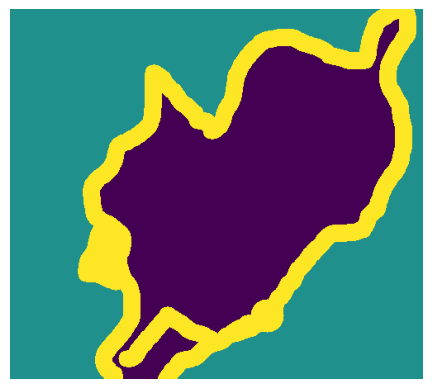

In [ ]:
!wget http://www.robots.ox.ac.uk/~vgg/data/pets/data/images.tar.gz
!wget http://www.robots.ox.ac.uk/~vgg/data/pets/data/annotations.tar.gz
!tar -xf images.tar.gz
!tar -xf annotations.tar.gz

import os
import numpy as np
import matplotlib.pyplot as plt
import random
from tensorflow.keras.utils import load_img, img_to_array
from PIL import Image
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

input_dir = "images/"
target_dir = "annotations/trimaps/"

img_size = (160, 160)
num_classes = 4
batch_size = 32

input_img_paths = sorted(
    [os.path.join(input_dir, fname) for fname in os.listdir(input_dir)
     if fname.endswith(".jpg")])

target_img_paths = sorted([
    os.path.join(target_dir, fname)
    for fname in os.listdir(target_dir)
    if fname.endswith(".png") and not fname.startswith(".")
])

plt.axis("off")
plt.imshow(Image.open(input_img_paths[9]))
plt.show()
plt.axis("off")
plt.imshow(Image.open(target_img_paths[9]))

def display_target(target_array):
    normalized_array = (target_array.astype("uint8") - 1) * 127
    plt.axis("off")
    plt.imshow(normalized_array[:, :, 0])

img = img_to_array(load_img(target_img_paths[9], color_mode="grayscale"))
display_target(img)

img_size = (200, 200)
num_imgs = len(input_img_paths)

random.Random(1337).shuffle(input_img_paths)
random.Random(1337).shuffle(target_img_paths)

def path_to_input_image(path):
    return img_to_array(load_img(path, target_size=img_size))

def path_to_target_image(path):
    img = img_to_array(
        load_img(path, target_size=img_size, color_mode="grayscale"))
    img = img.astype("uint8") - 1
    return img

input_images = np.zeros((num_imgs,) + img_size + (3,), dtype="float32")
target_images = np.zeros((num_imgs,) + img_size + (1,), dtype="uint8")

for i in range(num_imgs):
    input_images[i] = path_to_input_image(input_img_paths[i])
    target_images[i] = path_to_target_image(target_img_paths[i])

num_val_samples = 1000
train_input_images = input_images[:-num_val_samples]
train_target_images = target_images[:-num_val_samples]
val_input_images = input_images[-num_val_samples:]
val_target_images = target_images[-num_val_samples:]

def get_model(img_size, num_classes):
    inputs = keras.Input(shape=img_size + (3,))
    x = layers.Rescaling(1./255)(inputs)
    x = layers.Conv2D(64, 3, strides=2, activation="relu", padding="same")(x)
    x = layers.Conv2D(64, 3, activation="relu", padding="same")(x)
    x = layers.Conv2D(128, 3, strides=2, activation="relu", padding="same")(x)
    x = layers.Conv2D(128, 3, activation="relu", padding="same")(x)
    x = layers.Conv2D(256, 3, strides=2, padding="same", activation="relu")(x)
    x = layers.Conv2D(256, 3, activation="relu", padding="same")(x)
    x = layers.Conv2DTranspose(256, 3, padding="same", activation="relu")(x)
    x = layers.Conv2DTranspose(256, 3, strides=2, padding="same", activation="relu")(x)
    x = layers.Conv2DTranspose(128, 3, activation="relu", padding="same")(x)
    x = layers.Conv2DTranspose(128, 3, strides=2, activation="relu", padding="same")(x)
    x = layers.Conv2DTranspose(64, 3, activation="relu", padding="same")(x)
    x = layers.Conv2DTranspose(64, 3, strides=2, activation="relu", padding="same")(x)
    outputs = layers.Conv2D(num_classes, 3, activation="softmax", padding="same")(x)
    model = keras.Model(inputs, outputs)
    return model

model = get_model(img_size=img_size, num_classes=3)
model.summary()

Epoch 1/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 46s 266ms/step - loss: 0.9734 - val_loss: 0.9382
Epoch 2/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 7s 67ms/step - loss: 0.9036 - val_loss: 0.8521
Epoch 3/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 7s 65ms/step - loss: 0.8489 - val_loss: 0.8964
Epoch 4/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 7s 69ms/step - loss: 0.8257 - val_loss: 0.7783
Epoch 5/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 7s 66ms/step - loss: 0.7910 - val_loss: 0.8023
Epoch 6/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 7s 67ms/step - loss: 0.7707 - val_loss: 0.7500
Epoch 7/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 7s 67ms/step - loss: 0.7505 - val_loss: 0.7305
Epoch 8/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 7s 65ms/step - loss: 0.7419 - val_loss: 0.7684
Epoch 9/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 7s 67ms/step - loss: 0.7334 - val_loss: 0.6941
Epoch 10/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 7s 67ms/step - loss: 0.7007 - val_loss: 0.6699
Epoch 11/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 7s 67ms/step - loss: 0.6819 - val_loss: 0.6495
Epoch 12/50
100/100 ━━━━━━━━━━━━━━━━━━━

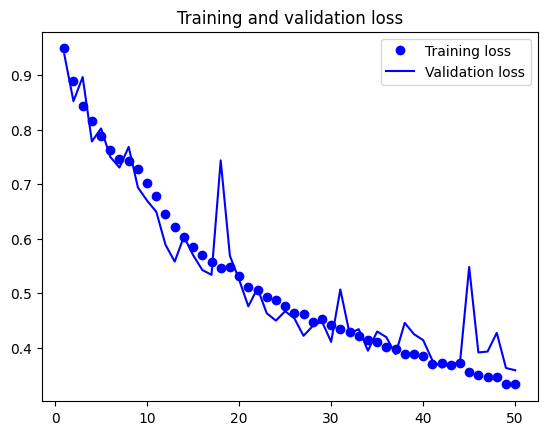

In [ ]:
model.compile(optimizer="rmsprop", loss="sparse_categorical_crossentropy")
callbacks = [
    keras.callbacks.ModelCheckpoint("oxford_segmentation.keras", save_best_only=True)
]
history = model.fit(
    train_input_images,
    train_target_images,
    batch_size=64,
    epochs=50,
    validation_data=(val_input_images, val_target_images),
    callbacks=callbacks,
)

epochs = range(1, len(history.history["loss"])+ 1)
loss = history.history["loss"]
val_loss = history.history["val_loss"]
plt.figure()
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.legend()
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 959ms/step


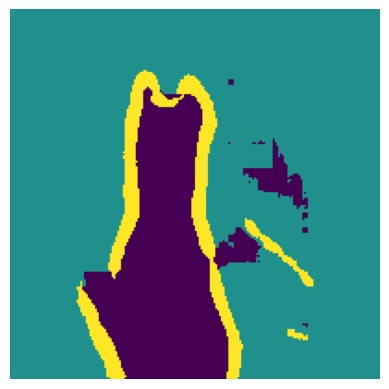

In [ ]:
from tensorflow.keras.utils import array_to_img
model = keras.models.load_model("oxford_segmentation.keras")

i = 4
test_image = val_input_images[i]
plt.axis("off")
plt.imshow(array_to_img(test_image))

mask = model.predict(np.expand_dims(test_image, axis=0))[0]

def display_mask(mask):
    mask = np.argmax(mask, axis=-1)
    mask *= 127
    plt.axis("off")
    plt.imshow(mask)

display_mask(mask)


# 9.3.2 Residuals: Passing the unaltered input forward a layer


#### Listing 9.2   Residual block where the number of filters changes

In [ ]:
from tensorflow import keras
from tensorflow.keras import layers

inputs = keras.Input(shape=(32, 32, 3))
x = layers.Conv2D(32, 3, activation="relu")(inputs)
# save off the residual
residual = x
# this is the layer we are creating a residual connection arround
x = layers.Conv2D(64, 3, activation="relu", padding="same")(x)
# Since the layer that the residual connection went around
# increased the number of output filters from 32 to 64,
# we use a 1 x 1 conv2D to project it to the correct shape
residual = layers.Conv2D(64, 1)(residual)
# Now the block output and the residual have the same shape, so can be added
x = layers.add([x, residual])


#### Listing 9.3   Case where the target block includes a max pooling layer

In [ ]:
inputs = keras.Input(shape=(32, 32, 3))
x = layers.Conv2D(32, 3, activation="relu")(inputs)
# Save off the residual (the output of the layer above)
residual = x
# We want the residual connection to go around this block
# which includes a 2 x 2 max pooling layer
# NB We use padding = "same" in both the convolution layer and the max pooling
# layer in order to avoid downsampling due to padding
x = layers.Conv2D(64, 3, activation="relu", padding="same")(x)
x = layers.MaxPooling2D(2, padding="same")(x)
# We use strides=2 in the residual projection in order to match the
# downsampling created by the max pooling layer
residual = layers.Conv2D(64, 1, strides=2)(residual)
# With the strides downsampling the residual, it can be added to output
# of the block that it went around
x = layers.add([x, residual])

#### Example convnet with residuals

In [ ]:
inputs = keras.Input(shape=(32, 32, 3))
x = layers.Rescaling(1./255)(inputs)

def residual_block(x, filters, pooling=False):
    residual = x
    x = layers.Conv2D(filters, 3, activation="relu", padding="same")(x)
    x = layers.Conv2D(filters, 3, activation="relu", padding="same")(x)
    # If we use max pooling, we add a strided convolution to the project
    # the residual to the desired shape. Strides downsample.
    if pooling:
        x = layers.MaxPooling2D(2, padding="same")(x)
        residual = layers.Conv2D(filters, 1, strides=2)(residual)
    # OTOH if we don't use pooling, we just use a 1 x 1 convolution
    # Only project the residual down if the number of channels has changed
    elif filters != residual.shape[-1]:
        residual = layers.Conv2D(filters, 1)(residual)
    x = layers.add([x, residual])
    return x

x = residual_block(x, filters=32, pooling=True)
x = residual_block(x, filters=64, pooling=True)
x = residual_block(x, filters=128, pooling=False)

x = layers.GlobalAveragePooling2D()(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model = keras.Model(inputs=inputs, outputs=outputs)
model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_4       │ (None, 32, 32, 3) │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ rescaling_1         │ (None, 32, 32, 3) │          0 │ input_layer_4[0]… │
│ (Rescaling)         │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_16 (Conv2D)  │ (None, 32, 32,    │        896 │ rescaling_1[0][0] │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_17 (Conv2D)  │ (None, 32, 32,    │      9,248 │ conv2d_16[0][0]   │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_1     │ (None, 16, 16,    │          0 │ conv2d_17[0][0]   │
│ (MaxPooling2D)      │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_18 (Conv2D)  │ (None, 16, 16,    │        128 │ rescaling_1[0][0] │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add_3 (Add)         │ (None, 16, 16,    │          0 │ max_pooling2d_1[… │
│                     │ 32)               │            │ conv2d_18[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_19 (Conv2D)  │ (None, 16, 16,    │     18,496 │ add_3[0][0]       │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_20 (Conv2D)  │ (None, 16, 16,    │     36,928 │ conv2d_19[0][0]   │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_2     │ (None, 8, 8, 64)  │          0 │ conv2d_20[0][0]   │
│ (MaxPooling2D)      │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_21 (Conv2D)  │ (None, 8, 8, 64)  │      2,112 │ add_3[0][0]       │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add_4 (Add)         │ (None, 8, 8, 64)  │          0 │ max_pooling2d_2[… │
│                     │                   │            │ conv2d_21[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_22 (Conv2D)  │ (None, 8, 8, 128) │     73,856 │ add_4[0][0]       │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_23 (Conv2D)  │ (None, 8, 8, 128) │    147,584 │ conv2d_22[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_24 (Conv2D)  │ (None, 8, 8, 128) │      8,320 │ add_4[0][0]       │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add_5 (Add)         │ (None, 8, 8, 128) │          0 │ conv2d_23[0][0],  │
│                     │                   │            │ conv2d_24[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ global_average_poo… │ (None, 128)       │          0 │ add_5[0][0]       │
│ (GlobalAveragePool… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense (Dense)       │ (None, 1)         │        129 │ global_average_p… │
└─────────────────────┴───────────────────┴────────────┴─────────────────

 Total params: 297,697 (1.14 MB)

 Trainable params: 297,697 (1.14 MB)

 Non-trainable params: 0 (0.00 B)

#### Residuals takeaway
With residual connections, you can build networks of arbitrary depth, without having to worry about vanishing gradients. Vanishing gradients occur when the gradients, or derivatives, used to update the weights of a neural network become progressively smaller as they are passed backward through the network during backpropagation. We preserve these weights by passing adding back the residual values before passing it onto the next layer.

### 9.3.3 Batch Normalization
Batch normalization is a technique used in deep learning to normalize the activations of each layer within a mini-batch. It helps to stabilize and accelerate the training process, leading to faster convergence and improved model performance. (from google's ai response)

Essentially, normalization is like that down on a vector, it is done to make a sample more like the others, and in a sense it is done to make computation easier, just as we often turn all vectors into unit vectors before using them in calculations.

In Keras there is a layer called `BatchNormalization` which adaptively normalizes the data flowing through it to improve the performance of the layers which come after it. Let's take a quick and dirty look

#### Listing 9.5   How to use batch normalization: the activation comes last

In [ ]:
x = layers.Conv2D(32, 3, use_bias=False)(x) # NB the lack of activation here
x = layers.BatchNormalization()(x)
# We place the activation after the BatchNormalization layer
x = layers.Activation("relu")(x)

### Putting it all together: a mini Xception-like model
As a reminder, here are the convnet architecture principles we've learned:


*   Your model should be organized into repeated blocks of layers, usually made up of multiple convolutional layers and a max pooling layer.
*   The number of filters in your layers should increase as the sie of the spatial feature maps decreases
*   Deep and narrow is better than broad and shallow (hehe 😜 🍆)
*   Introducing residual connections around blocks of layers helps you train deeper networks
*   Batch normalization layers after your convolutional layers may increase performance
*   It can be helpful to replace Conv2D layers with SeperableConv2D, because they're more parameter-efficient
  *   Limited by CUDA support from nVidia...YMMV



In [ ]:
data_augmentation = keras.Sequential(
    [
        layers.RandomFlip("horizontal"),
        layers.RandomRotation(0.1),
        layers.RandomZoom(0.2),
    ]
)


inputs = keras.Input(shape=(180, 180, 3))
x = data_augmentation(inputs)
x = layers.Rescaling(1./255)(x)
x = layers.Conv2D(32, kernel_size=5, use_bias=False)(x)

for size in [32, 64, 128, 256, 512]:
    residual = x

    x = layers.BatchNormalization()(x)
    x = layers.Activation("relu")(x)
    x = layers.SeparableConv2D(size, 3, padding="same", use_bias=False)(x)

    x = layers.BatchNormalization()(x)
    x = layers.Activation("relu")(x)
    x = layers.SeparableConv2D(size, 3, padding="same", use_bias=False)(x)

    x = layers.MaxPooling2D(3, strides=2, padding="same")(x)

    residual = layers.Conv2D(
        size, 1, strides=2, padding="same", use_bias=False)(residual)
    x = layers.add([x, residual])

x = layers.GlobalAveragePooling2D()(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model = keras.Model(inputs=inputs, outputs=outputs)
model.summary()


Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_6       │ (None, 180, 180,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ sequential          │ (None, 180, 180,  │          0 │ input_layer_6[0]… │
│ (Sequential)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ rescaling_2         │ (None, 180, 180,  │          0 │ sequential[0][0]  │
│ (Rescaling)         │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_25 (Conv2D)  │ (None, 176, 176,  │      2,400 │ rescaling_2[0][0] │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalization │ (None, 176, 176,  │        128 │ conv2d_25[0][0]   │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation          │ (None, 176, 176,  │          0 │ batch_normalizat… │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ separable_conv2d    │ (None, 176, 176,  │      1,312 │ activation[0][0]  │
│ (SeparableConv2D)   │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 176, 176,  │        128 │ separable_conv2d… │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_1        │ (None, 176, 176,  │          0 │ batch_normalizat… │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ separable_conv2d_1  │ (None, 176, 176,  │      1,312 │ activation_1[0][… │
│ (SeparableConv2D)   │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_3     │ (None, 88, 88,    │          0 │ separable_conv2d… │
│ (MaxPooling2D)      │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_26 (Conv2D)  │ (None, 88, 88,    │      1,024 │ conv2d_25[0][0]   │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add_6 (Add)         │ (None, 88, 88,    │          0 │ max_pooling2d_3[… │
│                     │ 32)               │            │ conv2d_26[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 88, 88,    │        128 │ add_6[0][0]       │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_2        │ (None, 88, 88,    │          0 │ batch_normalizat… │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ separable_conv2d_2  │ (None, 88, 88,    │      2,336 │ activation_2[0][… │
│ (SeparableConv2D)   │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 88, 88,    │        256 │ separable_conv2d

 Total params: 721,857 (2.75 MB)

 Trainable params: 718,849 (2.74 MB)

 Non-trainable params: 3,008 (11.75 KB)

## 9.4 Interpreting what convnets learn
One can basically:

*   Visualize the intermediate activations
*   Visualize the trained convnet filters themselves
*   Visualize the heatmaps of class actication in an image

Let's friggin explore each one, partner.



### 9.4.1   Visualizing Intermediate activations
When we visualize intermediate activations, we are displaying the values returned by the various convolution and pooling layers in a model, given a certain input. This shows us how the input is decomposed into the different filters learned by the network.

In [ ]:
from tensorflow import keras
fp = "/content/drive/MyDrive/Colab_Content/keras_models/convnets/"
model_fp_str = fp + "convnet_from_scratch_with_augmentation.keras"
model = keras.models.load_model(model_fp_str)
model.summary()

Model: "functional_19"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_11 (InputLayer)     │ (None, 180, 180, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ sequential_3 (Sequential)       │ (None, 180, 180, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ rescaling_5 (Rescaling)         │ (None, 180, 180, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_25 (Conv2D)              │ (None, 178, 178, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_20 (MaxPooling2D) │ (None, 89, 89, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_26 (Conv2D)              │ (None, 87, 87, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_21 (MaxPooling2D) │ (None, 43, 43, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_27 (Conv2D)              │ (None, 41, 41, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_22 (MaxPooling2D) │ (None, 20, 20, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_28 (Conv2D)              │ (None, 18, 18, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_23 (MaxPooling2D) │ (None, 9, 9, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_29 (Conv2D)              │ (None, 7, 7, 256)      │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_6 (Flatten)             │ (None, 12544)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 12544)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 1)              │        12,545 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,982,084 (7.56 MB)

 Trainable params: 991,041 (3.78 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 991,043 (3.78 MB)

#### Listing 9.6   Preprocessing a single image

In [ ]:
from tensorflow import keras
import numpy as np

img_path = keras.utils.get_file(
    "cat.jpg", "https://img-datasets.s3.amazonaws.com/cat.jpg")

def get_img_array(img_path, target_size):
    img = keras.utils.load_img(img_path, target_size=target_size)
    array = keras.utils.img_to_array(img)
    array = np.expand_dims(array, axis=0)
    return array

img_tensor = get_img_array(img_path, target_size=(180, 180))

80329/80329 ━━━━━━━━━━━━━━━━━━━━ 0s 1us/step


#### Listing 9.7 Displaying the test picture

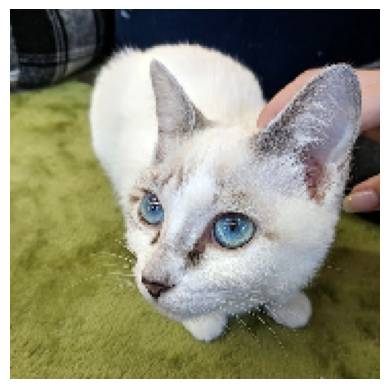

In [ ]:
import matplotlib.pyplot as plt

plt.axis("off")
plt.imshow(img_tensor[0].astype("uint8"))
plt.show()

#### Listing 9.8   Instantiating a model that returns layer actications
When fed an image input, the model defined below returns the values of the layer activations in the original model, as a list. For each input, this model outputs a list of nice images, corresponding to each layers activation mask

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step


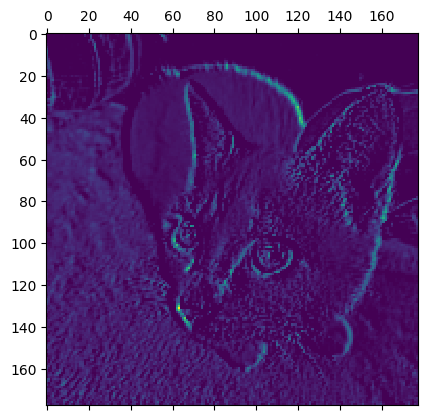

In [ ]:
from tensorflow.keras import layers
import matplotlib.pyplot as plt

layer_outputs = []
layer_names = []
for layer in model.layers:
    if isinstance(layer, (layers.Conv2D, layers.MaxPooling2D)):
        layer_outputs.append(layer.output)
        layer_names.append(layer.name)
activation_model = keras.Model(inputs=model.input, outputs=layer_outputs)

activations = activation_model.predict(img_tensor)
plt.matshow(activations[0][0, :, :, 3], cmap="viridis")

#### Listing 9.11 Visualizing every channel in every intermediate activation

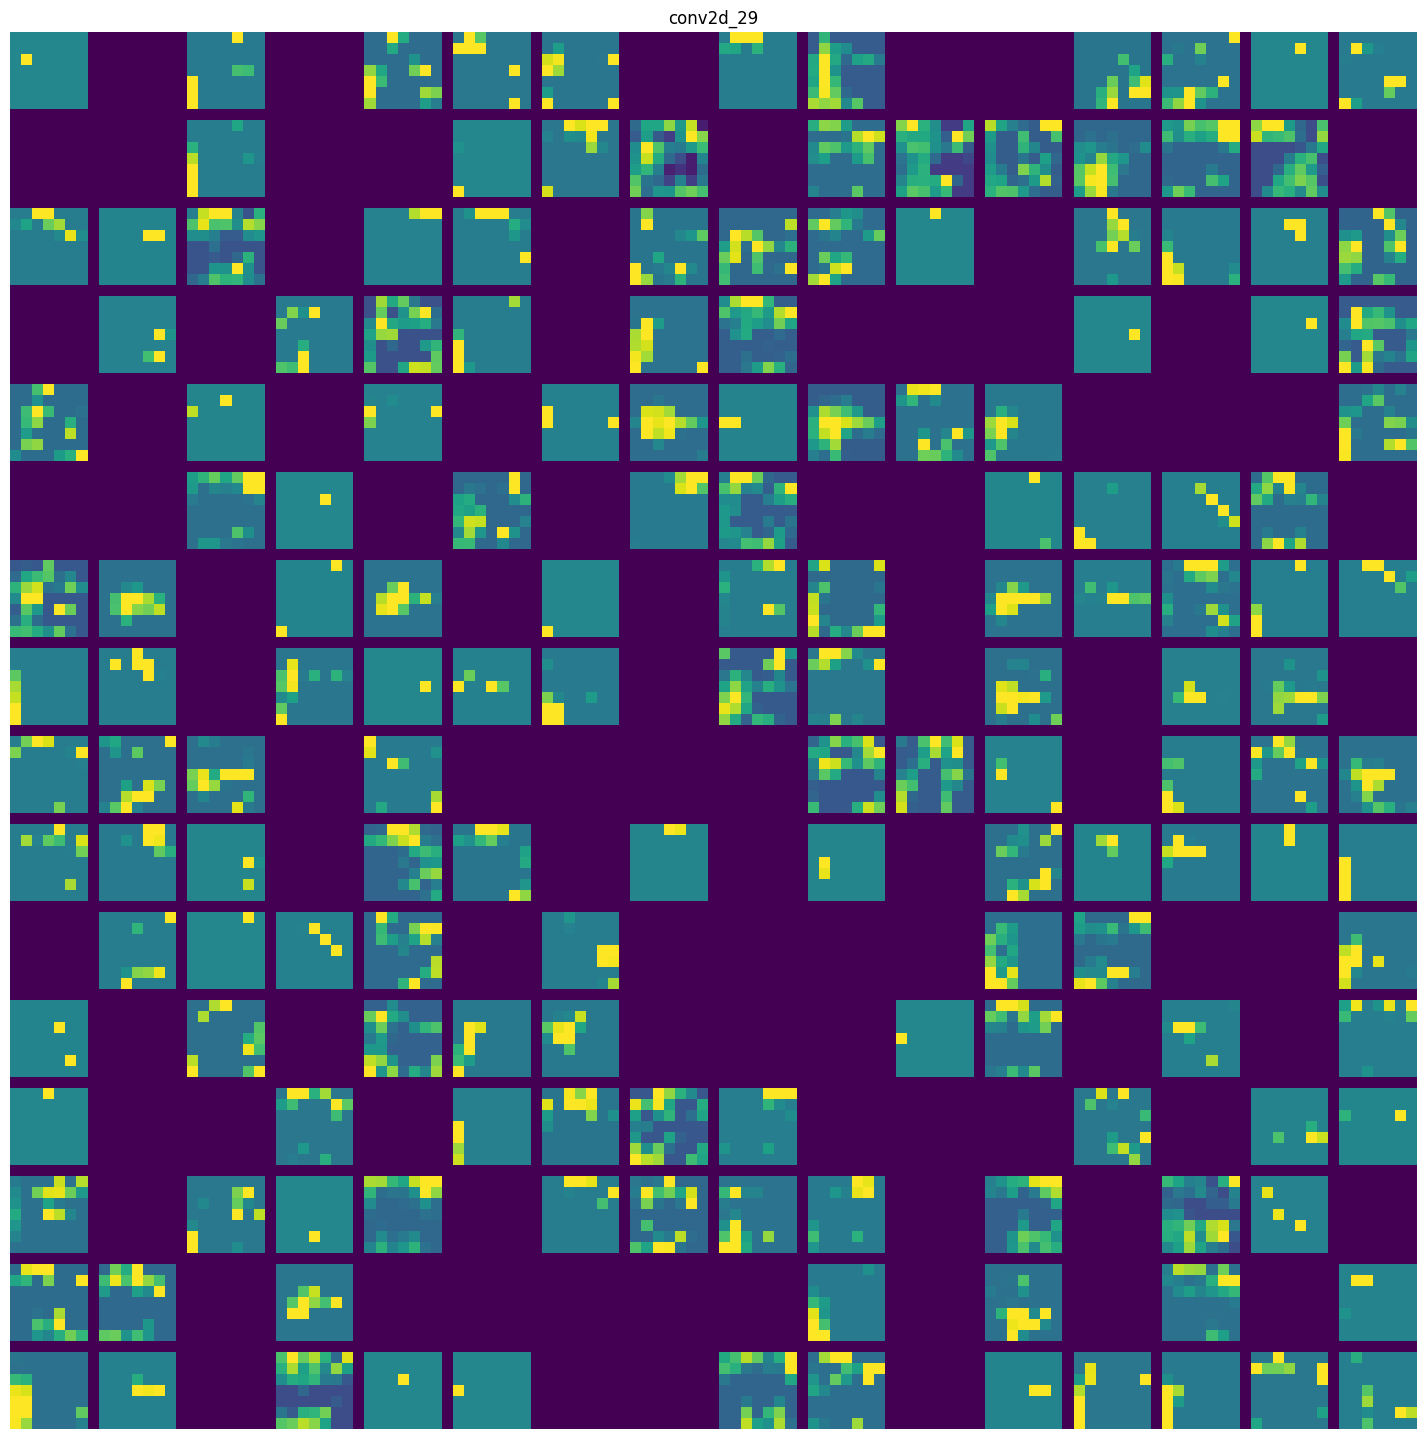

In [ ]:
images_per_row = 16
for layer_name, layer_activation in zip(layer_names, activations):
  num_features = layer_activation.shape[-1]
  size = layer_activation.shape[1]
  n_cols = num_features // images_per_row
  display_grid = np.zeros(((size + 1) * n_cols - 1, images_per_row * (size + 1) - 1))
  for col in range(n_cols):
    for row in range(images_per_row):
      channel_index = col * images_per_row + row
      channel_image = layer_activation[0, :, :, channel_index].copy()
      if channel_image.sum() != 0:
        channel_image -= channel_image.mean()
        channel_image /= channel_image.std()
        channel_image *= 64
        channel_image += 128
      channel_image = np.clip(channel_image, 0, 255).astype("uint8")
      display_grid[col * (size + 1): (col + 1) * size + col,
                   row * (size + 1): (row + 1) * size + row] = channel_image
scale = 1. / size
plt.figure(figsize=(scale * display_grid.shape[1],
                    scale * display_grid.shape[0]))
plt.title(layer_name)
plt.grid(False)
plt.axis("off")
plt.imshow(display_grid, aspect="auto", cmap="viridis")

# Visualizing Convnet filters


In [ ]:
from tensorflow import keras
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import os

def generate_filter_pattern(filter_index, feature_extractor, img_width, img_height, img_channels): # Added feature_extractor, img_width, img_height, img_channels as arguments
    num_iterations = 50
    learning_rate = 10.
    image = tf.random.uniform(
        minval=0.4,
        maxval=0.6,
        shape=(1, img_width, img_height, img_channels))
    for i in range(num_iterations):
      # Pass feature_extractor to gradient_ascent_step as well
      image = gradient_ascent_step(image, filter_index, learning_rate, feature_extractor)
    return image[0].numpy()

def compute_loss(image, filter_index, feature_extractor): # Added feature_extractor as argument
    activation = feature_extractor(image)
    filter_activation = activation[:, 2:-2, 2:-2, filter_index]
    return tf.reduce_mean(filter_activation)

@tf.function
def gradient_ascent_step(image, filter_index, learning_rate, feature_extractor): # Added feature_extractor as argument
    with tf.GradientTape() as tape:
        tape.watch(image)
        # Pass feature_extractor to compute_loss
        loss = compute_loss(image, filter_index, feature_extractor)
        gradients = tape.gradient(loss, image)
        gradients = tf.math.l2_normalize(gradients)
        image += gradients * learning_rate
    return image

def deprocess_image(image):
  image -= image.mean()
  image /= image.std()
  image *= 64
  image +=128
  image = np.clip(image, 0, 255).astype("uint8")
  image = image[25:-25, 25:-25, :]
  return image


model = keras.applications.xception.Xception(weights="imagenet", include_top=False)

for layer in model.layers:
    if isinstance(layer, (keras.layers.Conv2D, keras.layers.SeparableConv2D)):
        print(layer.name, "--", layer.activation)
        feature_extractor = keras.Model(inputs=model.input, outputs=layer.output)
        img_width = 200
        img_height = 200
        img_channels = 3
        img_tensor = tf.random.uniform(shape=(1, img_width, img_height, img_channels)) * 200
        activation = feature_extractor(keras.applications.xception.preprocess_input(img_tensor))

         # Determine the number of filters from the activation shape
        num_filters = activation.shape[-1]

        # Use the layer's name for directory creation and file naming
        os.makedirs(f"drive/MyDrive/Colab_Content/{layer.name}", exist_ok=True)
        plt.axis("off")
        # Iterate up to the actual number of filters in the layer
        for i in range(num_filters):
          print(f"Processing filter {i} for layer {layer.name}")
          keras.utils.save_img(
                # Pass necessary arguments to generate_filter_pattern
                f"drive/MyDrive/Colab_Content/{layer.name}/layer_activation_{i}.png", deprocess_image(generate_filter_pattern(filter_index=i, feature_extractor=feature_extractor, img_width=img_width, img_height=img_height, img_channels=img_channels)))


block1_conv1 -- <function linear at 0x7eb14fb57600>
Processing filter 0 for layer block1_conv1
Processing filter 1 for layer block1_conv1
Processing filter 2 for layer block1_conv1
Processing filter 3 for layer block1_conv1
Processing filter 4 for layer block1_conv1
Processing filter 5 for layer block1_conv1
Processing filter 6 for layer block1_conv1
Processing filter 7 for layer block1_conv1
Processing filter 8 for layer block1_conv1
Processing filter 9 for layer block1_conv1
Processing filter 10 for layer block1_conv1
Processing filter 11 for layer block1_conv1
Processing filter 12 for layer block1_conv1
Processing filter 13 for layer block1_conv1
Processing filter 14 for layer block1_conv1
Processing filter 15 for layer block1_conv1
Processing filter 16 for layer block1_conv1
Processing filter 17 for layer block1_conv1
Processing filter 18 for layer block1_conv1
Processing filter 19 for layer block1_conv1
Processing filter 20 for layer block1_conv1
Processing filter 21 for layer blo

In [ ]:
all_images = []
for filter_index in range(64):
  print(f"Processing filter {filter_index}")
  all_images.append(deprocess_image(generate_filter_pattern(filter_index)))

margin = 5
n = 8
cropped_width = img_width - 25 * 2
cropped_height = img_height - 25 * 2
width = n * cropped_width + (n - 1) * margin
height = n * cropped_height + (n - 1) * margin
stitched_filters = np.zeros((width, height, 3))


for i in range(n):
  for j in range(n):
    image = all_images[i * n + j]
    row_start = (cropped_width + margin) * i
    row_end = (cropped_width + margin) * i + cropped_width
    column_start = (cropped_height + margin) * j
    column_end = (cropped_height + margin) * j + cropped_height
    stitched_filters[row_start:row_end, column_start:column_end, :] = image

keras.utils.save_img(
        f"stitched_filters_{layer_name}.png", stitched_filters)



Processing filter 0
Processing filter 1
Processing filter 2
Processing filter 3
Processing filter 4
Processing filter 5
Processing filter 6
Processing filter 7
Processing filter 8
Processing filter 9
Processing filter 10
Processing filter 11
Processing filter 12
Processing filter 13
Processing filter 14
Processing filter 15
Processing filter 16
Processing filter 17
Processing filter 18
Processing filter 19
Processing filter 20
Processing filter 21
Processing filter 22
Processing filter 23
Processing filter 24
Processing filter 25
Processing filter 26
Processing filter 27
Processing filter 28
Processing filter 29
Processing filter 30
Processing filter 31
Processing filter 32
Processing filter 33
Processing filter 34
Processing filter 35
Processing filter 36
Processing filter 37
Processing filter 38
Processing filter 39
Processing filter 40
Processing filter 41
Processing filter 42
Processing filter 43
Processing filter 44
Processing filter 45
Processing filter 46
Processing filter 47
Pr

### 9.4.3   Visualizing heatmaps of class activation
*Class Activation Maps* visualize heatmaps of the classes activated over an input image.

####    Listing 9.20   Loading the Xception network with pretrained weights
NB this time we will include the densely connected classifier on top. We have discarded it so far. Below, we must wrangle images from my iPhone in .HEIC format into more friendly jpg format.

In [ ]:
!pip install Pillow pillow-heif
from PIL import Image
import pillow_heif
import os



def convert_png_to_jpg(png_path, jpg_path):
  """Converts a PNG image to JPG.

  Args:
      png_path: Path to the input PNG image.
      jpg_path: Path to save the output JPG image.
  """
  try:
    image = Image.open(png_path)
    # Ensure the image is in RGB mode (removes transparency if present)
    image = image.convert('RGB')
    image.save(jpg_path, 'jpeg')
    print(f"Successfully converted '{png_path}' to '{jpg_path}'")
  except FileNotFoundError:
    print(f"Error: PNG file not found at '{png_path}'")
  except Exception as e:
    print(f"An error occurred: {e}")

# Example usage:
png_file = 'input.png'
jpg_file = 'output.jpg'
convert_png_to_jpg(png_file, jpg_file)

def convert_heic_to_jpg(heic_filepath, jpg_filepath):
  try:
    heif_file = pillow_heif.open_heif(heic_filepath)
    image = Image.frombytes(
      heif_file.mode,
      heif_file.size,
      heif_file.data,
      "raw",
      heif_file.mode,
      heif_file.stride,
    )
    image.save(jpg_filepath, "jpeg")
    return True
  except Exception as e:
    print(f"Error converting {heic_filepath}: {e}")
    return False

def convert_folder_heic_to_jpg(folder_path):
  for filename in os.listdir(folder_path):
    if filename.lower().endswith((".heic", ".heif")):
      heic_filepath = os.path.join(folder_path, filename)
      jpg_filename = os.path.splitext(filename)[0] + ".jpg"
      jpg_filepath = os.path.join(folder_path, jpg_filename)
      convert_heic_to_jpg(heic_filepath, jpg_filepath)
      print(f"Converted {heic_filepath} to {jpg_filepath}")


def convert_folder_png_to_jpg(folder_path):
  for filename in os.listdir(folder_path):
    if filename.lower().endswith(".png"):
      png_filepath = os.path.join(folder_path, filename)
      jpg_filename = os.path.join(folder_path, os.path.splitext(filename)[0] + ".jpg")
      convert_png_to_jpg(png_filepath, jpg_filename)

# usage:
image_paths = [
               "/content/drive/MyDrive/Colab_Content/sample_data/snowboarding/heatmap/"
               ]

for image_path in image_paths:
  convert_folder_heic_to_jpg(image_path)
  convert_folder_png_to_jpg(image_path)


Error: PNG file not found at 'input.png'
Converted /content/drive/MyDrive/Colab_Content/sample_data/snowboarding/heatmap/John_at_Mt_Baker.HEIC to /content/drive/MyDrive/Colab_Content/sample_data/snowboarding/heatmap/John_at_Mt_Baker.jpg
Converted /content/drive/MyDrive/Colab_Content/sample_data/snowboarding/heatmap/Tapei_101.HEIC to /content/drive/MyDrive/Colab_Content/sample_data/snowboarding/heatmap/Tapei_101.jpg
Converted /content/drive/MyDrive/Colab_Content/sample_data/snowboarding/heatmap/John_Tapei_101.HEIC to /content/drive/MyDrive/Colab_Content/sample_data/snowboarding/heatmap/John_Tapei_101.jpg
Converted /content/drive/MyDrive/Colab_Content/sample_data/snowboarding/heatmap/John_Bascom_Hall.HEIC to /content/drive/MyDrive/Colab_Content/sample_data/snowboarding/heatmap/John_Bascom_Hall.jpg
Successfully converted '/content/drive/MyDrive/Colab_Content/sample_data/snowboarding/heatmap/John_skating_in_tapei.PNG' to '/content/drive/MyDrive/Colab_Content/sample_data/snowboarding/heatma

91884032/91884032 ━━━━━━━━━━━━━━━━━━━━ 5s 0us/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step
35363/35363 ━━━━━━━━━━━━━━━━━━━━ 0s 1us/step
ski: 91.81%
paddle: 1.32%
parachute: 1.15%
catamaran: 0.35%
pole: 0.28%


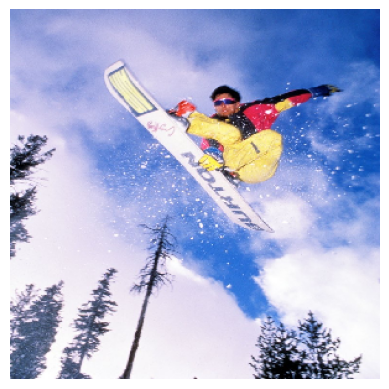

In [ ]:
from tensorflow.keras.preprocessing.image import load_img
import matplotlib.pyplot as plt
from tensorflow import keras
import numpy as np


model = keras.applications.xception.Xception(weights="imagenet")

pet_img_path = "/content/drive/MyDrive/Colab_Content/sample_data/PetPics/"
snow_img_path = "/content/drive/MyDrive/Colab_Content/sample_data/snowboarding/CraigKelly/"
img_paths = [pet_img_path, snow_img_path]
pet_img_fnames_arr = os.listdir(pet_img_path)
snow_img_fnames_arr = os.listdir(snow_img_path)
#img = keras.preprocessing.image.load_img(image_path, target_size=(299, 299))

def predict_and_show(img_path):
  img = load_img(img_path, target_size=(299, 299))
  img_array = get_img_array(img_path, target_size=(299, 299))
  preds = model.predict(img_array)
  for prediction in keras.applications.xception.decode_predictions(preds, top=5)[0]:
    print(f"{prediction[1]}: {prediction[2]*100:.2f}%")
  plt.axis("off")
  plt.imshow(img)
  plt.show()

def get_img_array(img_path, target_size):
  img = keras.utils.load_img(img_path, target_size=target_size)
  array = keras.utils.img_to_array(img)
  array = np.expand_dims(array, axis=0)
  array = keras.applications.xception.preprocess_input(array)
  return array
"""
for img_fname in pet_img_fnames_arr:
  img_path = pet_img_path + img_fname
  predict_and_show(img_path)
  print("")

print("And now something a little more challenging?")
print()
"""
for img_fname in snow_img_fnames_arr:
  img_path = snow_img_path + img_fname
  predict_and_show(img_path)
  print("")


#### Listing 9.21 Preprocessing an input image for Xception

In [ ]:
img_path = "/content/drive/MyDrive/Colab_Content/sample_data/snowboarding/heatmap/John_Bascom_Hall.jpg"
def get_img_array(img_path, target_size):
    img = keras.utils.load_img(img_path, target_size=target_size)
    array = keras.utils.img_to_array(img)
    array = np.expand_dims(array, axis=0)
    array = keras.applications.xception.preprocess_input(array)
    return array

img_array = get_img_array(img_path, target_size=(299, 299))
preds = model.predict(img_array)
keras.applications.xception.decode_predictions(preds, top=5)[0]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


[('n03903868', 'pedestal', np.float32(0.18839492)),
 ('n04429376', 'throne', np.float32(0.09621115)),
 ('n03877845', 'palace', np.float32(0.09401859)),
 ('n02699494', 'altar', np.float32(0.087160215)),
 ('n03781244', 'monastery', np.float32(0.051089223))]

#### Listing 9.22 Setting up a model that returns the last convolutional output

In [ ]:
last_conv_layer_name = "block14_sepconv2_act"
classifier_layer_names = [
    "avg_pool",
    "predictions",
]
last_conv_layer = model.get_layer(last_conv_layer_name)
last_conv_layer_model = keras.Model(model.inputs, last_conv_layer.output)


#### Listing 9.23      Reapplying the classifier on top of the last convolutional output

In [ ]:
classifier_input = keras.Input(shape=last_conv_layer.output.shape[1:])
x = classifier_input
for layer_name in classifier_layer_names:
    x = model.get_layer(layer_name)(x)
classifier_model = keras.Model(classifier_input, x)

#### Listing 9.24   Retrieving the gradients of the top predicted class

In [ ]:
import tensorflow as tf

with tf.GradientTape() as tape:
    # Compute the actications of the lasat conv layer and make the tape watch it
    last_conv_layer_output = last_conv_layer_model(img_array)
    tape.watch(last_conv_layer_output)
    # Retrieve the activation channel corresponding to the top predicted class
    preds = classifier_model(last_conv_layer_output)
    top_pred_index = tf.argmax(preds[0])
    top_class_channel = preds[:, top_pred_index]
# This is the gradient of the top predicted class with regard to
# the output feature map of the last convolutional layer.
grads = tape.gradient(top_class_channel, last_conv_layer_output)

/usr/local/lib/python3.11/dist-packages/keras/src/models/functional.py:237: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor']
Received: inputs=Tensor(shape=(1, 299, 299, 3))
  warnings.warn(msg)


Now we'll apply pooling and importance weighting to the gradient tensor to obtain our heatmap of class activation.

#### Listing 9.25 Gradient pooling and channel-importance weighting

In [ ]:
# This is a vector where each entry is the mean intensity of the gradient for a given channel.
# It quantifies the importance of each channel with regard to the top predicted class.

pooled_grads = tf.reduce_mean(grads, axis=(0, 1, 2))
last_conv_layer_output = last_conv_layer_output.numpy()[0]
# We multiply each channel in the feature-map array by "how important this channel is"
for i in range(pooled_grads.shape[-1]):
    last_conv_layer_output[:, :, i] *= pooled_grads[i]
# The channel-wise mean of the resulting feature map is our heatmap of class activation.
heatmap = np.mean(last_conv_layer_output, axis=-1)


Listing 9.26  Heatmap post-processing

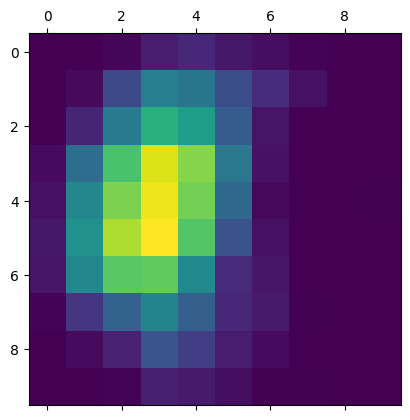

In [ ]:
heatmap = np.maximum(heatmap, 0)
heatmap /= np.max(heatmap)
plt.matshow(heatmap)

#### Listing 9.27   Superimposing the heatmap on the original picture

<ipython-input-68-b02bcb2e48c4>:9: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  jet = cm.get_cmap("jet")


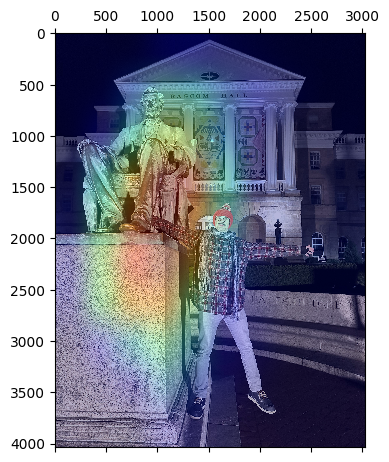

In [ ]:
import matplotlib.cm as cm
import numpy as np # Import numpy

def superimpose_heatmap(img_path, heatmap): # Add heatmap as an argument
  img = keras.preprocessing.image.load_img(img_path)
  img = keras.preprocessing.image.img_to_array(img)
  #print(img)
  heatmap = np.uint8(255 * heatmap)
  jet = cm.get_cmap("jet")
  jet_colors = jet(np.arange(256))[:, :3]
  jet_heatmap = jet_colors[heatmap]

  jet_heatmap = keras.preprocessing.image.array_to_img(jet_heatmap)
  jet_heatmap = jet_heatmap.resize((img.shape[1], img.shape[0]))
  jet_heatmap = keras.preprocessing.image.img_to_array(jet_heatmap)

  superimposed_img = jet_heatmap * 0.4 + img
  superimposed_img = keras.preprocessing.image.array_to_img(superimposed_img)

  img_path_file_name = os.path.basename(img_path).strip(".jpg")
  save_path_file_name = os.path.join(img_path_file_name + "_heatmap.jpg")
  save_path = os.path.join(os.path.dirname(img_path), save_path_file_name)
  superimposed_img.save(save_path)

  plt.matshow(superimposed_img)

# Heatmap calculated in Listing 9.26
superimpose_heatmap(img_path, heatmap)

In [ ]:
!echo lovums

lovums
